In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [199]:
df = pd.read_csv("AB_NYC_2019.csv")

In [200]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [201]:
features = ['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [202]:
df[features].head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [203]:
our_df = df[features]

In [204]:
our_df.shape

(48895, 10)

In [205]:
our_df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [206]:
our_df = our_df.fillna(0)

In [207]:
our_df.shape

(48895, 10)

In [208]:
our_df['neighbourhood_group'].mode()

0    Manhattan
dtype: object

In [209]:
# Train test Split

from sklearn.model_selection import train_test_split


df_full_train, df_test = train_test_split(our_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [210]:
# distribute our data
# 60% for train
# 20% for validation
# 20% for test
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [211]:
df_train.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
385,Queens,Entire home/apt,40.76434,-73.92132,110,4,30,0.32,1,363
33147,Brooklyn,Private room,40.73442,-73.95854,70,5,2,0.16,1,0
33881,Brooklyn,Entire home/apt,40.66359,-73.99487,460,1,33,2.75,5,113
37208,Brooklyn,Private room,40.63766,-74.02626,99,3,1,0.12,2,362
7485,Brooklyn,Private room,40.65118,-74.00842,2000,2,0,0.00,2,365


In [212]:
# Rest the index of df_train, df_val, df_test

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [213]:
# Setting-up the y values
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_val.price.values

In [174]:
# Remove the target varible from the dataset 
del df_train['price']
del df_val['price']
del df_test['price']

In [175]:
df_full_train.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [176]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 21838 to 33003
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   room_type                       39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   price                           39116 non-null  int64  
 5   minimum_nights                  39116 non-null  int64  
 6   number_of_reviews               39116 non-null  int64  
 7   reviews_per_month               39116 non-null  float64
 8   calculated_host_listings_count  39116 non-null  int64  
 9   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.3+ MB


In [177]:
useful_features = [col for col in df_full_train.columns if col not in ['id', 'price']]
categorical = [col for col in useful_features if df_full_train[col].dtype == 'object']
numerical = [col for col in useful_features if col not in categorical]

In [178]:
useful_features

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [179]:
categorical

['neighbourhood_group', 'room_type']

In [180]:
numerical

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [181]:
cor_matrix = df_train[numerical].corr()
cor_matrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084313,0.019638,-0.020536,-0.025427,0.019039,-0.012974
longitude,0.084313,1.000000,-0.062937,0.058299,0.136407,-0.117029,0.082892
minimum_nights,0.019638,-0.062937,1.000000,-0.075564,-0.120368,0.120308,0.140542
number_of_reviews,-0.020536,0.058299,-0.075564,1.000000,0.599733,-0.072518,0.173308
reviews_per_month,-0.025427,0.136407,-0.120368,0.599733,1.000000,-0.045017,0.168808
calculated_host_listings_count,0.019039,-0.117029,0.120308,-0.072518,-0.045017,1.000000,0.229346
availability_365,-0.012974,0.082892,0.140542,0.173308,0.168808,0.229346,1.000000


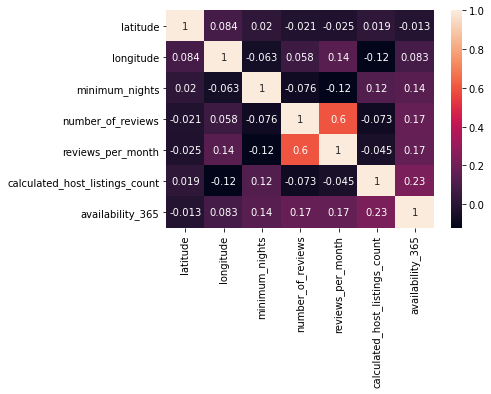

In [182]:
sns.heatmap(cor_matrix, annot=True)
plt.show()

In [183]:
y_train = pd.DataFrame(y_train, columns =['price'])
y_train.head()

,price
0,110
1,70
2,460
3,99
4,2000


In [184]:
y_train['above_average'] = (y_train.price > 152).astype(int)

In [185]:
del y_train['price']

In [186]:
from sklearn.metrics import mutual_info_score

score = mutual_info_score(y_train['above_average'],df_train[ 'neighbourhood_group'])
score1 = mutual_info_score(y_train['above_average'],df_train['room_type'])

print(round(score, 2))
print(round(score1, 2))

0.05
0.14


In [187]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical].to_dict(orient="records")
X_val = dv.fit_transform(val_dict)


In [188]:
X_train.shape

(29337, 8)

In [189]:
X_val.shape

(9779, 8)

In [190]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [191]:
s = model.score(X_train,y_train)
orignal_accuracy = round(s,2)
print('Test Accuracy Score', orignal_accuracy)

Test Accuracy Score 0.79


In [192]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [193]:
features

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [194]:
features_copy = features.copy()
features_copy.remove('price')
features_copy

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [195]:
for f in features_copy:
    copy = features_copy.copy()
    copy.remove(f)
    train_dict = df_train[copy].to_dict(orient="records")
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[copy].to_dict(orient="records")
    X_val = dv.fit_transform(val_dict)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    above_average_decision = (y_pred >= 0.5)
    y_val = np.array(y_val)
    accuracy = round((y_val == above_average_decision).mean() - orignal_accuracy,3)
    
    print('For the model without the feature ' + f + ' the difference in accuracy is: ', accuracy)

For the model without the feature neighbourhood_group the difference in accuracy is:  -0.79
For the model without the feature room_type the difference in accuracy is:  -0.79
For the model without the feature latitude the difference in accuracy is:  -0.79
For the model without the feature longitude the difference in accuracy is:  -0.79
For the model without the feature minimum_nights the difference in accuracy is:  -0.79
For the model without the feature number_of_reviews the difference in accuracy is:  -0.79
For the model without the feature reviews_per_month the difference in accuracy is:  -0.79
For the model without the feature calculated_host_listings_count the difference in accuracy is:  -0.79
For the model without the feature availability_365 the difference in accuracy is:  -0.79


In [214]:
y_train = df_train.price.values

In [215]:
y_train = pd.DataFrame(y_train, columns =['price'])
y_train.head()

,price
0,110
1,70
2,460
3,99
4,2000


In [216]:
# y_train['price'] = np.log(y_train['price'])
# y_train.head()

In [217]:
train_dict = df_train[features_copy].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features_copy].to_dict(orient="records")
X_val = dv.fit_transform(val_dict)

In [218]:
X_train.shape

(29337, 15)

In [219]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
alpha = 0
clf = Ridge(alpha=a)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
mean_squared_error(y_val, y_pred)

41053.20403923025

In [224]:
alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
    clf = Ridge(alpha=a)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    e = mean_squared_error(y_val, y_pred)
    print(round(e,3))

41053.204
41053.263
41053.791
41059.146
41112.94
